# Customer Relationship Management (CRM): Recency Frequency Monetary (RFM) Analysis

CRM is Customer Relationship Management. Of course, there is also analytics. The essence is to get more revenue, get to know customers and make them feel special. CRM Analytics is an analysis that includes topics such as analyzing customer data (purchase information, etc.), getting to know customers better, segmenting customers and making decisions based on these segments (special offers, etc.). In the most basic terms, the aim is to recognize customer behaviors based on past data and to determine strategies according to these behaviors.

1. Importing Libraries and Dataset

Business Problem:
An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.

Data Set Story
The dataset named Online Retail II contains the sales of a UK-based online retail store between 01/12/2009 - 09/12/2011.

Variables:

InvoiceNo: Invoice number. Unique number for each transaction, i.e. invoice. If it starts with C, canceled transaction.

StockCode: Product code. Unique number for each product.

Description: Product name

Quantity: Product quantity. It expresses how many of the products in the invoices are sold.

InvoiceDate: Invoice date and time.

UnitPrice: Product price (in pounds sterling)

CustomerID: Unique customer number

Country: Country name. The country where the customer lives.

We then use pd.set_option() to set the display options for a DataFrame. The first option, "display.max_column", sets the maximum number of columns that will be displayed in the output to None, meaning all columns will be displayed. The second option, "display.max_rows", sets the maximum number of rows that will be displayed in the output to None, meaning all rows will be displayed.

Finally, we use pd.set_option() again to set the float formatting for the output to show three decimal places. The lambda x: "%.3f" % x function formats the float to three decimal places using the string formatting syntax.

In [21]:
# Importing Libraries
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Read the Excel file into a DataFrame
df = pd.read_excel("online_retail.xlsx", sheet_name="Year 2010-2011")

# Exploratory Data Analysis

In [15]:
# Display the first 10 rows of the dataframe
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50


In [16]:
# Display the last 10 rows of the dataframe
df.tail(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,15.60
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00


In [17]:
# Display the numbers of rows and colunms of the dataframe
df.shape

(406830, 9)

In [18]:
# Display the informantion of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   TotalPrice   406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [9]:
# Missing Values
print(df.isnull().sum())
print("---------------")

print("Number of lines before removing missing values: ", df.shape[0])

# Dropping Missing Values
df.dropna(inplace=True)

print("Number of lines after removing missing values: ", df.shape[0])

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64
---------------
Number of lines before removing missing values:  541910
Number of lines after removing missing values:  406830


In [103]:
#Dataframe does not have a total cost expression, to add it (per products)
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head(1)

C:\Users\Vishal_WFH\AppData\Local\Temp\ipykernel_16720\2435310681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalPrice"] = df["Quantity"] * df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [11]:
# Unique Invoice Count
print("Unique Invoice Count: ", df["Invoice"].nunique())

# Unique Customer Count
print("Unique Customer Count: ", df["Customer ID"].nunique())

Unique Invoice Count:  22190
Unique Customer Count:  4372


In [46]:
# How Many of the Products were Sold
sale = df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(10)
sale

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(1, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(2, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(7, 0, 'POPCORN HOLDER'),
  Text(8, 0, 'RABBIT NIGHT LIGHT'),
  Text(9, 0, 'MINI PAINT SET VINTAGE ')])

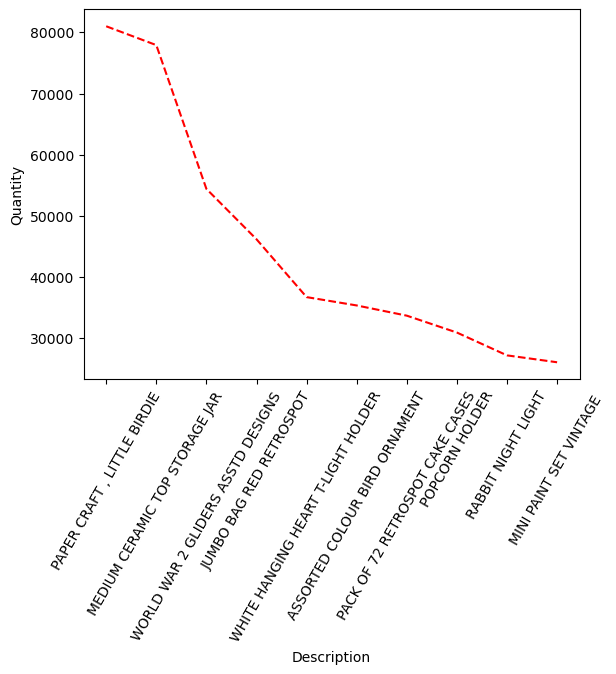

In [49]:
# Visualization: line plot of description and quantity
sns.lineplot(x='Description', y='Quantity', data=sale, linestyle='--', color='red')
plt.xticks(rotation=60)

In [57]:
# Total Price per Invoice
a = df.groupby("Invoice").agg({"TotalPrice": "sum"}).head(10)
a

,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
536370,855.86
536371,204.00
536372,22.20
536373,259.86


<Axes: xlabel='Invoice'>

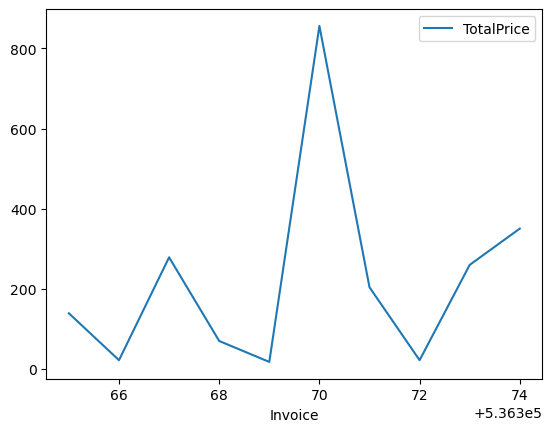

In [65]:
# Visualization: line plot of invoic and Totalprice
sns.lineplot(a)

In [27]:
# Describe of Data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406830.0,12.061276,-80995.0,2.0,5.0,12.0,80995.0,248.693065
InvoiceDate,406830,2011-07-10 16:31:30.127424512,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
Price,406830.0,3.460507,0.0,1.25,1.95,3.75,38970.0,69.31508
Customer ID,406830.0,15287.68416,12346.0,13953.0,15152.0,16791.0,18287.0,1713.603074
TotalPrice,406830.0,20.401848,-168469.6,4.2,11.1,19.5,168469.6,427.591192


In [30]:
# Invoice starting with C means refunded product
df = df[~df["Invoice"].str.contains("C", na=False)]

print("Number of rows after subtracting refund data: ", df.shape[0])

Number of rows after subtracting refund data:  397925


# Calculating RFM Metrics

One of the methods used in CRM Analytics is RFM Analysis. RFM is a combination of the initials of the terms Recency, Frequency and Monetary, each of which deals with a different characteristic of the customer. These characteristics are as follows;

Recency is calculated by subtracting the date of the last interaction (shopping) of the customers from the date of the analysis (if it is a historical data set, the date of the analysis is determined close to the date of data collection), giving the date difference. The more recently a customer has shopped, the more likely they are to keep the brand (company) in mind for future purchases. It can also be used to identify customers who have not shopped for a long time and encourage them to visit the store again.

Frequency indicates the number of times a customer makes a purchase. If it can be recognized that the customer's purchases are in a cycle, actions can be taken to predict when the customer will come back to the store or to remind them of their needs.

The monetary value is the money left by the customer as a result of these purchases, indicating the total expenditure. While the monetary value can identify the customers who spend the most, it also carries the risk of alienating customers who spend relatively small amounts or new customers.

In [31]:
# Date Ranges in the Dataframe
print("First date:", df["InvoiceDate"].min())
print("Last date:", df["InvoiceDate"].max())

# Since the Dataset is Old, We Need to Set the Date of Analysis as a More Closer Date
today_date = dt.datetime(2011, 12, 11)

First date: 2010-12-01 08:26:00
Last date: 2011-12-09 12:50:00


In [69]:
# Calculating RFM Metrics and Assigning Them to a New Dataframe
# Group the data by customer ID and calculate the Recency, Frequency, and Monetary (RFM) metrics
rfm = df.groupby('Customer ID').agg({
                            'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,  # Recency
                            'Invoice': lambda Invoice: Invoice.nunique(),  # Frequency
                            'TotalPrice': lambda TotalPrice: TotalPrice.sum()  # Monetary
})

# Rename the columns to recency, frequency, and monetary
rfm.columns = ["recency", "frequency", "monetary"]

# Display the first 10 rows of the new dataframe
rfm.head(10)


,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,8,2506.04
12353.0,205,1,89.00
12354.0,233,1,1079.40
12355.0,215,1,459.40


In [70]:
x = rfm.head(10)
x

,recency,frequency,monetary
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,8,2506.04
12353.0,205,1,89.00
12354.0,233,1,1079.40
12355.0,215,1,459.40


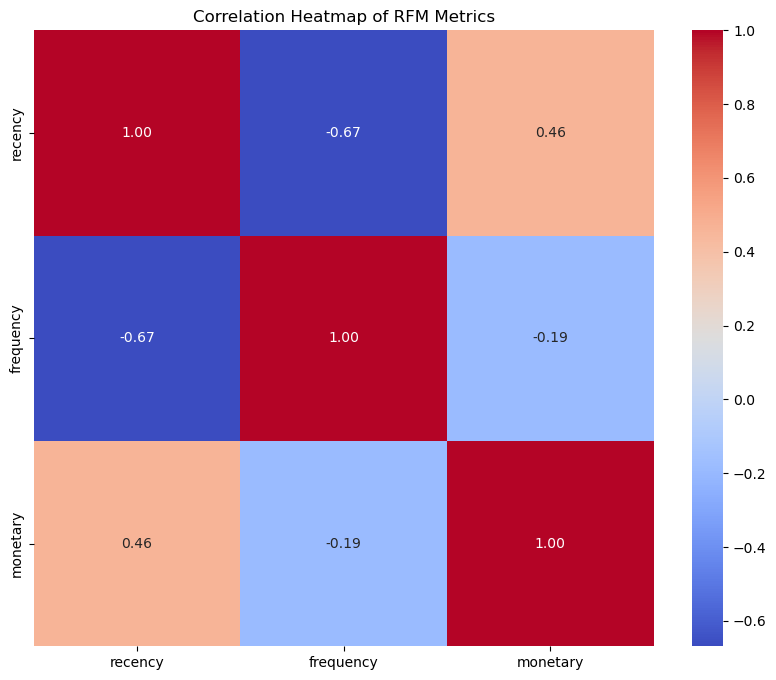

In [72]:
# Create a heatmap to show the correlation between Recency, Frequency, and Monetary
plt.figure(figsize=(10, 8))
correlation_matrix = x[['recency', 'frequency', 'monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()

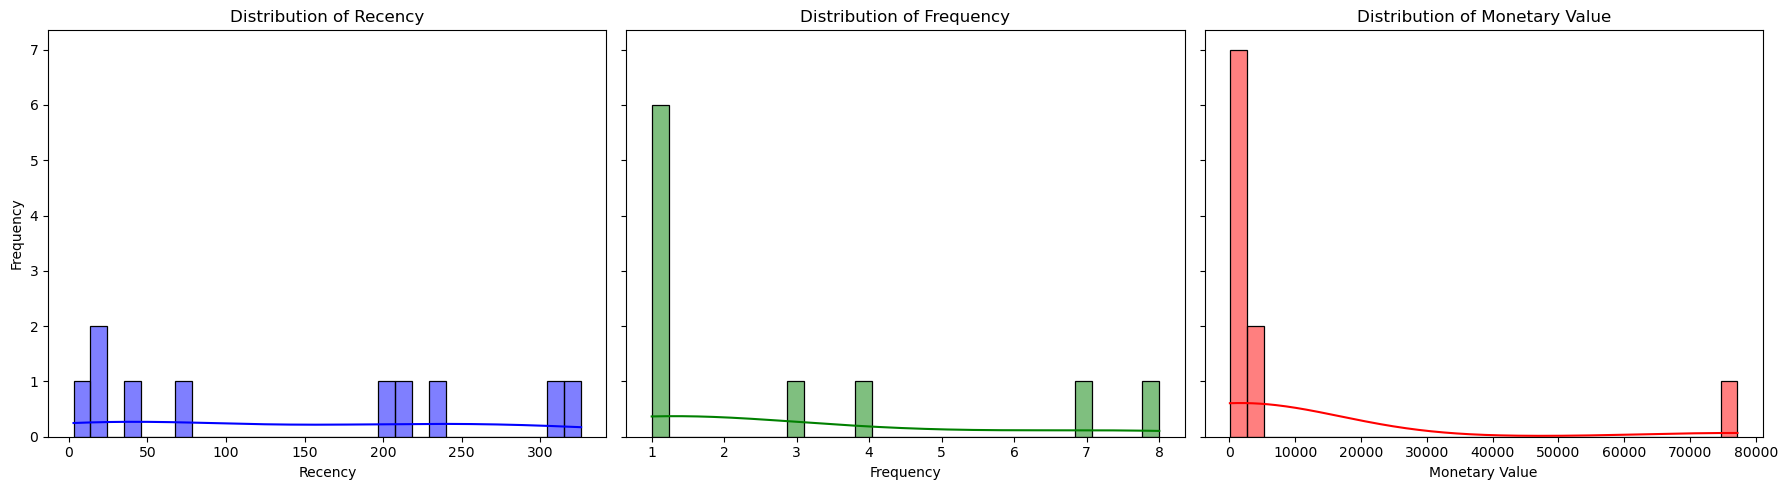

In [73]:
# Create histograms for each RFM metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
sns.histplot(x['recency'], bins=30, ax=axes[0], color='blue', kde=True)
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')

sns.histplot(x['frequency'], bins=30, ax=axes[1], color='green', kde=True)
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency')

sns.histplot(x['monetary'], bins=30, ax=axes[2], color='red', kde=True)
axes[2].set_title('Distribution of Monetary Value')
axes[2].set_xlabel('Monetary Value')

plt.tight_layout()
plt.show()

In [35]:
# Describe of RFM Dataframe
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,93.041484,100.007757,1.0,18.000,51.00,142.50,374.00
frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
monetary,4339.0,2053.797166,8988.247836,0.0,307.245,674.45,1661.64,280206.02


In [36]:
#Monetary value 0 is not the result we want, we need to remove these records
rfm = rfm[rfm["monetary"] > 0]

# Describe of RFM Dataframe
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
frequency,4338.0,4.272706,7.706221,1.00,1.000,2.000,5.00,210.00
monetary,4338.0,2054.270609,8989.229895,3.75,307.415,674.485,1661.74,280206.02


# Calculating RFM Scores

However, all of the values to be obtained as a result of these processes are relative values in terms of proximity & remoteness, frequency & infrequency and scarcity & abundance (according to whom according to what). Therefore, when conducting RFM Analysis, it would be useful to evaluate the data set within the data set itself and to bring these values to a more standardized interpretation by putting them into a rule. While doing this scoring, new values between 1 and 5 can be assigned to the Innovation, Frequency and Monetization values. The RFM value is formed by combining these values.

In [77]:
# Calculation of the Recency Score
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])

#Calculation of the Frequency Score
#rank usage: it is a method for assigning a value to multiple repeated expressions (a value falling into 2 different categories, etc.).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#Calculating the Monetary Score
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#Calculation of the RF Score
rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

# View of Dataframe
rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
Customer ID,,,,,,,
12346.0,326,1,77183.60,1,1,5,11
12347.0,3,7,4310.00,5,5,5,55
12348.0,76,4,1797.24,2,4,4,24
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11
12352.0,37,8,2506.04,3,5,5,35
12353.0,205,1,89.00,1,1,1,11
12354.0,233,1,1079.40,1,1,4,11
12355.0,215,1,459.40,1,1,2,11


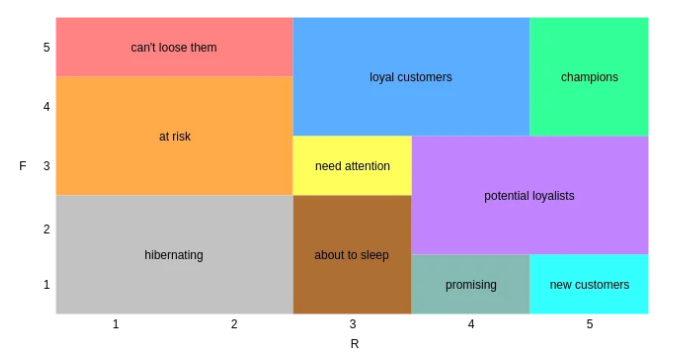

can't loose them → A class of customers who used to shop very frequently but have not shopped for a long time and should not be lost.

at risk → A class of customers who shop relatively frequently but have not shopped for a long time. 

hibernating → Customers who are literally asleep, both shopped infrequently and have not shopped for a long time.

about to sleep → A class of customers who do not shop frequently and have not shopped for some time; they are heading towards sleep.

need attention → This is the class of customers in the middle of the RF graph (33%), moving towards the risky group if not addressed.

new customers → A class of customers who have not shopped frequently (maybe once) and have been shopping for a short period of time, they are considered as new customers.

promising → New customers are the aged version of new customers :) they are customers who have not shopped frequently and have shopped for a short period of time.

potential loyalists → Customers who shop moderately often and it has not been long since their last purchase.

loyal customers → Customers who shop very often and it has been a short time since their last purchase.

champions → They are our champions, our crown jewels! Customers who shop very often and have made their last purchase within a very short period of time.

In [78]:
rfm[rfm["RF_SCORE"] == "55"].head(10) #Champion Customers

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
Customer ID,,,,,,,
12347.0,3,7,4310.00,5,5,5,55
12362.0,4,10,5226.23,5,5,5,55
12417.0,4,9,3649.10,5,5,5,55
12423.0,1,8,1859.31,5,5,4,55
12433.0,1,7,13375.87,5,5,5,55
12437.0,2,18,4951.41,5,5,5,55
12464.0,11,8,1212.05,5,5,4,55
12471.0,3,30,19824.05,5,5,5,55
12490.0,6,10,5417.93,5,5,5,55


In [79]:
# Converting RF_SCORE to Segment Name with Regex
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)


In [80]:
# Segments' Statistical Info
seg = rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])
seg

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep        53.312500   352   1.161932   352   471.994375   352
at_Risk              153.785835   593   2.878583   593  1084.535297   593
cant_loose           132.968254    63   8.380952    63  2796.155873    63
champions              6.361769   633  12.417062   633  6857.963918   633
hibernating          217.605042  1071   1.101774  1071   488.643307  1071
loyal_customers       33.608059   819   6.479853   819  2864.247791   819
need_attention        52.427807   187   2.326203   187   897.627861   187
new_customers          7.428571    42   1.000000    42   388.212857    42
potential_loyalists   17.398760   484   2.010331   484  1041.222004   484
promising             23.421053    95   1.000000    95   290.913158    95

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "('recency', 'mean')"),
  Text(1, 0, "('recency', 'count')"),
  Text(2, 0, "('frequency', 'mean')"),
  Text(3, 0, "('frequency', 'count')"),
  Text(4, 0, "('monetary', 'mean')"),
  Text(5, 0, "('monetary', 'count')")])

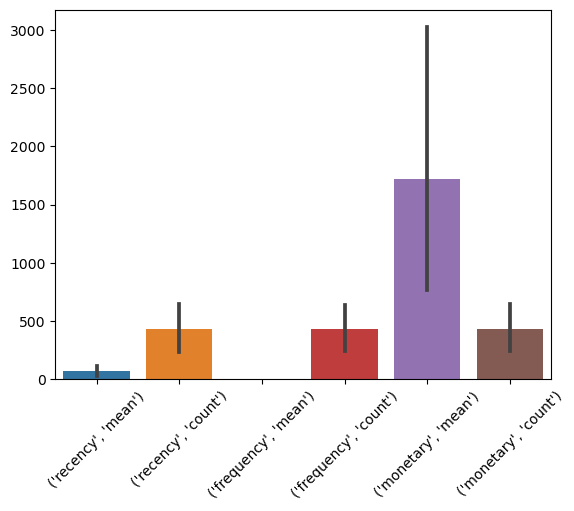

In [85]:
sns.barplot(seg)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'about_to_sleep'),
  Text(1, 0, 'at_Risk'),
  Text(2, 0, 'cant_loose'),
  Text(3, 0, 'champions'),
  Text(4, 0, 'hibernating'),
  Text(5, 0, 'loyal_customers'),
  Text(6, 0, 'need_attention'),
  Text(7, 0, 'new_customers'),
  Text(8, 0, 'potential_loyalists'),
  Text(9, 0, 'promising')])

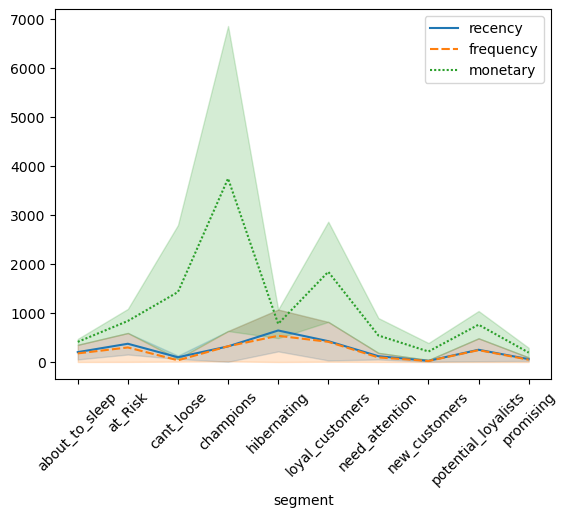

In [87]:
sns.lineplot(seg)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'about_to_sleep'),
  Text(1, 0, 'at_Risk'),
  Text(2, 0, 'cant_loose'),
  Text(3, 0, 'champions'),
  Text(4, 0, 'hibernating'),
  Text(5, 0, 'loyal_customers'),
  Text(6, 0, 'need_attention'),
  Text(7, 0, 'new_customers'),
  Text(8, 0, 'potential_loyalists'),
  Text(9, 0, 'promising')])

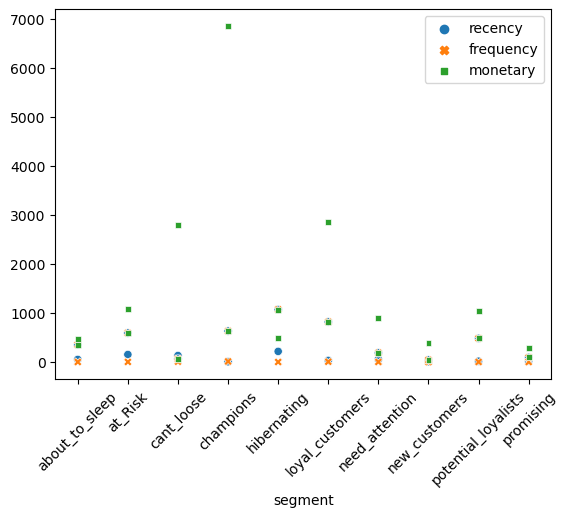

In [89]:
sns.scatterplot(seg)
plt.xticks(rotation=45)

<Axes: xlabel='None-None', ylabel='segment'>

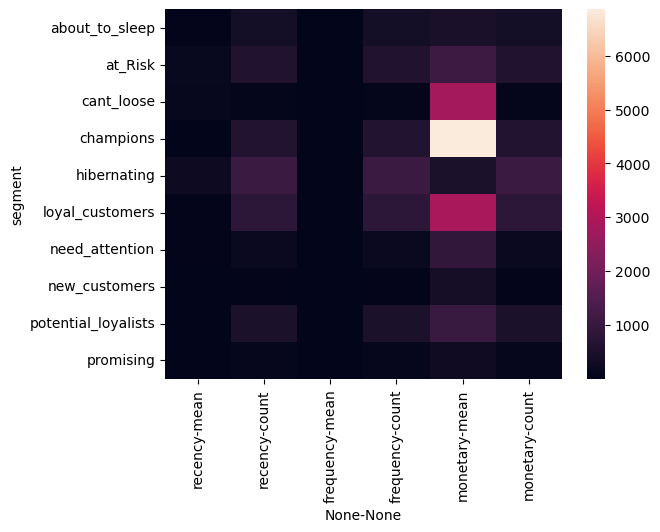

In [90]:
sns.heatmap(seg)

# Action Plans

For example, we want to make a campaign specific to a segment: "cant loose them": For this we will select cant loose them customers.

In [41]:
new_df = pd.DataFrame()

new_df["new_customer_id"] = rfm[rfm["segment"] == "cant_loose"].index

new_df["new_customer_id"] = new_df["new_customer_id"].astype(int)

new_df.shape

(63, 1)

In [42]:
new_df

,new_customer_id
0,12643
1,12853
2,12868
3,12947
4,12980
...,...
58,18037
59,18073
60,18094
61,18168


<Axes: >

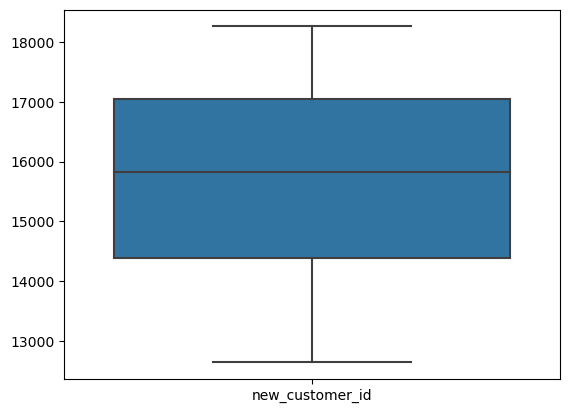

In [96]:
sns.boxplot(new_df)

<Axes: >

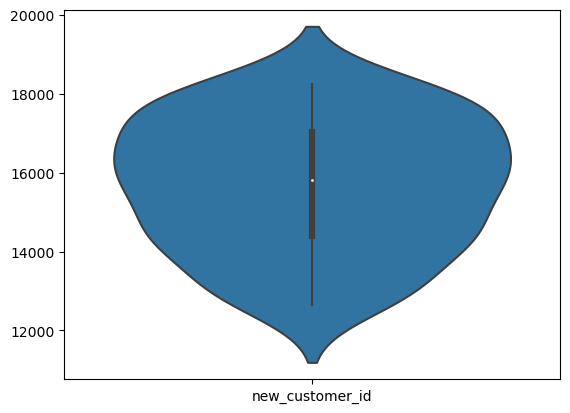

In [97]:
sns.violinplot(new_df)

<Axes: ylabel='Density'>

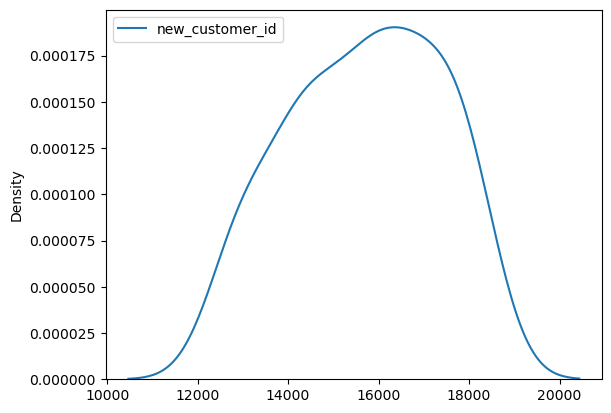

In [99]:
sns.kdeplot(new_df)